# Endangered Species

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
species      = pd.read_csv('./species_info.csv')
observations = pd.read_csv('./observations.csv')

display(species.head())
display(observations.head())

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


In [8]:
print(species.info())
print(observations.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5824 non-null   object
 1   scientific_name      5824 non-null   object
 2   common_names         5824 non-null   object
 3   conservation_status  191 non-null    object
dtypes: object(4)
memory usage: 182.1+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23296 entries, 0 to 23295
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scientific_name  23296 non-null  object
 1   park_name        23296 non-null  object
 2   observations     23296 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 546.1+ KB
None


<h2> What is the distribution of conservation_status for animals? </h2>

In [3]:
species[~species['conservation_status'].isnull()].head()

,category,scientific_name,common_names,conservation_status
7,Mammal,Canis latrans,Coyote,Species of Concern
8,Mammal,Canis lupus,Gray Wolf,Endangered
9,Mammal,Canis rufus,Red Wolf,Endangered
29,Mammal,Eptesicus fuscus,Big Brown Bat,Species of Concern
30,Mammal,Lasionycteris noctivagans,Silver-Haired Bat,Species of Concern


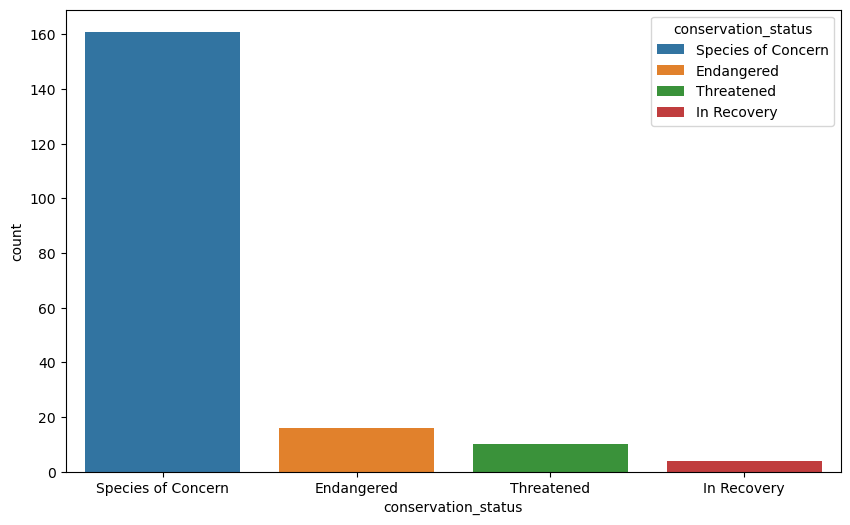

In [11]:
plt.figure(figsize=(10, 6))
sns.countplot(x=species['conservation_status'], hue=species['conservation_status'])
plt.show()

## Are certain types of species more likely to be endangered?

In [15]:
endangered_species = species[species['conservation_status'] == 'Endangered'].reset_index(drop=True)
print(len(endangered_species))
endangered_species

16


,category,scientific_name,common_names,conservation_status
0,Mammal,Canis lupus,Gray Wolf,Endangered
1,Mammal,Canis rufus,Red Wolf,Endangered
2,Mammal,Myotis grisescens,Gray Myotis,Endangered
3,Mammal,Myotis sodalis,"Indiana Bat, Indiana Or Social Myotis",Endangered
4,Mammal,Glaucomys sabrinus coloratus,"Carolina Northern Flying Squirrel, Northern Fl...",Endangered
5,Bird,Grus americana,Whooping Crane,Endangered
6,Bird,Vermivora bachmanii,"Bachman's Warbler, Bachman's Wood Warbler",Endangered
7,Bird,Picoides borealis,Red-Cockaded Woodpecker,Endangered
8,Fish,Etheostoma percnurum,Duskytail Darter,Endangered
9,Fish,Noturus baileyi,Smoky Madtom,Endangered


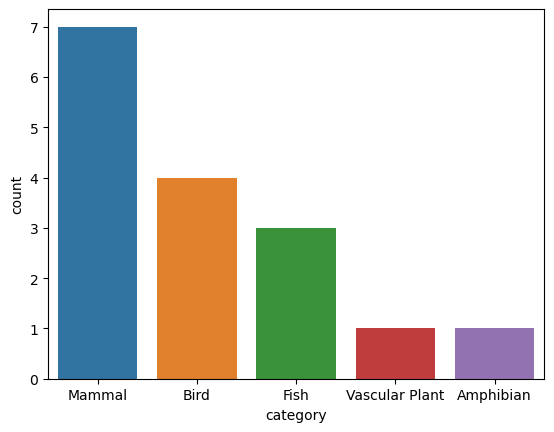

In [16]:
sns.countplot(x='category', data=endangered_species, hue='category')
plt.show()

## Are the differences between species and their conservation status significant?

## Which species were spotted the most at each park?

In [73]:
observations.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


In [55]:
parks = observations['park_name'].unique()

park_species_most_dict = {}
for park in parks:
    species_num_list = []
   
    park_data            = observations[observations['park_name'] == park]
    most_spotted_num     = park_data['observations'].max()
    most_spotted_species = park_data['scientific_name'][park_data['observations'] == most_spotted_num].tolist()
    
    if len(most_spotted_species) == 1:
        species_num_list.append(most_spotted_species[0])
        species_num_list.append(most_spotted_num)
        #species_num_dict[most_spotted_species[0]] = most_spotted_num
        park_species_most_dict[park] = species_num_list
    elif len(most_spotted_species) > 1:
        species_list = []
        for species in most_spotted_species:
            species_list.append(species)
            species_list.append(most_spotted_num)
            species_num_list.append(species_list)
        park_species_most_dict[park] = species_num_list

print(park_species_most_dict)

{'Great Smoky Mountains National Park': ['Sonchus asper ssp. asper', 147], 'Yosemite National Park': ['Ivesia shockleyi var. shockleyi', 223], 'Bryce National Park': ['Valerianella radiata', 176], 'Yellowstone National Park': ['Lycopodium tristachyum', 321]}


In [69]:
park_species_most_df = pd.DataFrame.from_dict(park_species_most_dict, orient='index', columns=['Most spotted species', 'Number of times spotted'])
park_species_most_df.reset_index(inplace=True)
park_species_most_df.rename(columns={'index': 'Park'}, inplace=True)
park_species_most_df

,Park,Most spotted species,Number of times spotted
0,Great Smoky Mountains National Park,Sonchus asper ssp. asper,147
1,Yosemite National Park,Ivesia shockleyi var. shockleyi,223
2,Bryce National Park,Valerianella radiata,176
3,Yellowstone National Park,Lycopodium tristachyum,321


In [82]:
park_species_most_df.sort_values(by=['Number of times spotted'], ascending=False)

,Park,Most spotted species,Number of times spotted
3,Yellowstone National Park,Lycopodium tristachyum,321
1,Yosemite National Park,Ivesia shockleyi var. shockleyi,223
2,Bryce National Park,Valerianella radiata,176
0,Great Smoky Mountains National Park,Sonchus asper ssp. asper,147


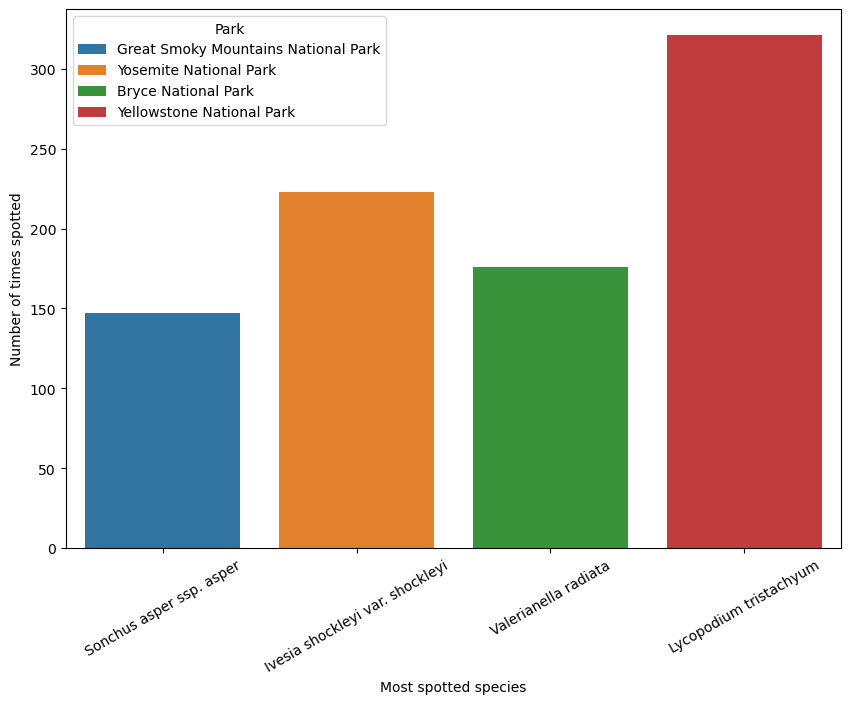

In [84]:
plt.figure(figsize=(10, 7))
sns.barplot(x='Most spotted species', y='Number of times spotted', data=park_species_most_df, hue='Park')
plt.xticks(rotation=30)
plt.show() 